In [2]:
from train_denoiser import img_to_numpy
from test_denoiser import test_acc
from custom_dataset import get_dataloader
from models.denoisers import DnCNN, REDNet20
from utils import create_resnet
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

attack_mode = ['fgsm', 'pgd']
#l2 attack eps
mnist_l2_eps = [0.25, 0.5, 1.0, 1.5, 2.0, 3.0]
cifar_l2_eps = [0.1, 0.25, 0.5, 0.75, 1, 1.5]
#linf attack eps
mnist_linf_eps = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25]
cifar_linf_eps = [0.1, 0.25, 0.5, 0.75, 1, 1.5]

#denoiser
dncnn_denoiser = DnCNN(in_channels=3, out_channels=3, depth=7, hidden_channels=64, use_bias=False).to(device)
dncnn_denoiser.load_state_dict(torch.load('./trained_denoisers/dncnn_mnist_mixed.pth', map_location=device))
dae_denoiser = REDNet20(in_channels=3, out_channels=3, use_bias=False).to(device)
dae_denoiser.load_state_dict(torch.load('./trained_denoisers/dae_mnist_mixed.pth', map_location=device))

#vanilla net
net = create_resnet(device=device)
net.load_state_dict(torch.load('./trained_models/mnist/resnet18_2.0+0_BL.pth', map_location=device))

_, test_loader = get_dataloader(dataset='mnist', batch_size=64, val=False)

# test mnist
def run_test(net, denoiser, attack_mode, eps_range, norm=2):

    acc1 = []
    acc2 = []
    for eps in eps_range:
        acc_orig, acc_adv, acc_denoised = test_acc(net, denoiser, test_loader, eps, norm, attack_mode)
        acc1.append(acc_adv)
        acc2.append(acc_denoised)
    return acc1, acc2

100%|██████████| 157/157 [00:07<00:00, 21.98it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.9313
Test Accuracy with fgsm attack + denoiser: 0.9913


100%|██████████| 157/157 [00:07<00:00, 19.83it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.8486
Test Accuracy with fgsm attack + denoiser: 0.9918


100%|██████████| 157/157 [00:07<00:00, 20.31it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.6947
Test Accuracy with fgsm attack + denoiser: 0.9915


100%|██████████| 157/157 [00:07<00:00, 20.23it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.5817
Test Accuracy with fgsm attack + denoiser: 0.9909


100%|██████████| 157/157 [00:07<00:00, 20.18it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.5043
Test Accuracy with fgsm attack + denoiser: 0.9903


100%|██████████| 157/157 [00:07<00:00, 20.29it/s]

Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.4252
Test Accuracy with fgsm attack + denoiser: 0.9861


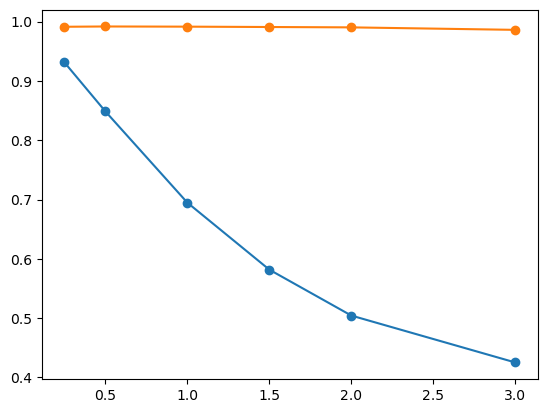

In [3]:
adv, denoised = run_test(net, dae_denoiser, 'fgsm', mnist_l2_eps, norm=2)
plt.plot(mnist_l2_eps, adv, marker='o')
plt.plot(mnist_l2_eps, denoised, marker='o')
plt.show()

100%|██████████| 157/157 [00:08<00:00, 18.47it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.8251
Test Accuracy with fgsm attack + denoiser: 0.99


100%|██████████| 157/157 [00:08<00:00, 19.31it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.5433
Test Accuracy with fgsm attack + denoiser: 0.9915


100%|██████████| 157/157 [00:07<00:00, 20.16it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.3118
Test Accuracy with fgsm attack + denoiser: 0.992


100%|██████████| 157/157 [00:08<00:00, 19.07it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.2454
Test Accuracy with fgsm attack + denoiser: 0.9901


100%|██████████| 157/157 [00:08<00:00, 18.57it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.212
Test Accuracy with fgsm attack + denoiser: 0.9597


100%|██████████| 157/157 [00:07<00:00, 19.69it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with fgsm attack: 0.1831
Test Accuracy with fgsm attack + denoiser: 0.7769


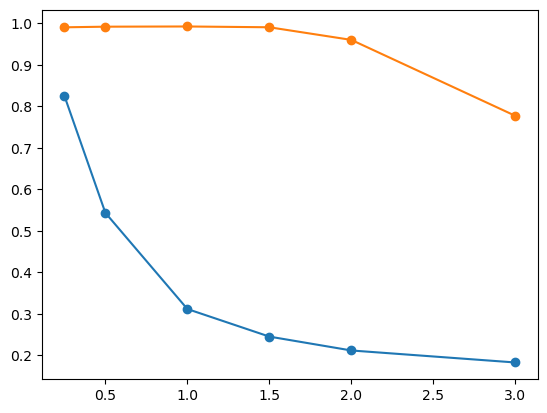

In [7]:
adv, denoised = run_test(net, dncnn_denoiser, 'fgsm', mnist_linf_eps, norm=np.inf)
plt.plot(mnist_l2_eps, adv, marker='o')
plt.plot(mnist_l2_eps, denoised, marker='o')
plt.show()

100%|██████████| 157/157 [01:01<00:00,  2.57it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with pgd attack: 0.8591
Test Accuracy with pgd attack + denoiser: 0.9893


100%|██████████| 157/157 [00:58<00:00,  2.70it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with pgd attack: 0.8477
Test Accuracy with pgd attack + denoiser: 0.9892


100%|██████████| 157/157 [01:00<00:00,  2.58it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with pgd attack: 0.8339
Test Accuracy with pgd attack + denoiser: 0.9896


100%|██████████| 157/157 [01:00<00:00,  2.58it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with pgd attack: 0.8208
Test Accuracy with pgd attack + denoiser: 0.9895


100%|██████████| 157/157 [01:00<00:00,  2.59it/s]


Test Accuracy no attack: 0.9927
Test Accuracy with pgd attack: 0.8021
Test Accuracy with pgd attack + denoiser: 0.9896


100%|██████████| 157/157 [01:00<00:00,  2.58it/s]

Test Accuracy no attack: 0.9927
Test Accuracy with pgd attack: 0.7477
Test Accuracy with pgd attack + denoiser: 0.9891


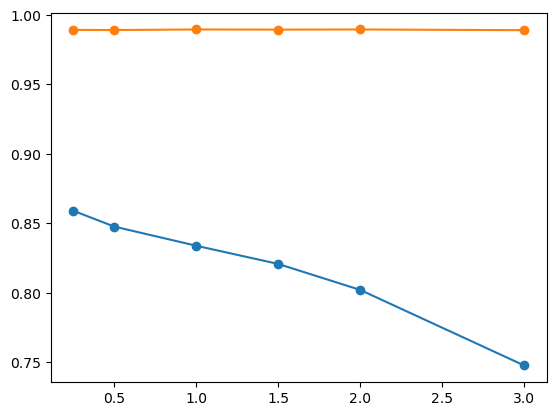

In [2]:
adv, denoised = run_test(net, dncnn_denoiser, 'pgd', mnist_l2_eps, norm=2)
plt.plot(mnist_l2_eps, adv, marker='o')
plt.plot(mnist_l2_eps, denoised, marker='o')
plt.show()